In [1]:
import numpy as np

def det_hessian_fd(u, h):
    """
    Approximate the determinant of the Hessian using finite differences.
    Assumes u is a 2D numpy array representing the solution grid.
    h is the grid spacing.
    """
    u_xx = (u[:-2, 1:-1] - 2*u[1:-1, 1:-1] + u[2:, 1:-1]) / h**2
    u_yy = (u[1:-1, :-2] - 2*u[1:-1, 1:-1] + u[1:-1, 2:]) / h**2
    u_xy = (u[:-2, :-2] - u[:-2, 2:] - u[2:, :-2] + u[2:, 2:]) / (4*h**2)
    return u_xx * u_yy - u_xy**2

def solve_monge_ampere(f, g, nx, ny, iterations=100):
    """
    Solve the Monge-Ampère equation on a rectangular domain.
    f is the source function as a 2D numpy array.
    g is the boundary condition function.
    nx, ny are the number of grid points in the x and y directions.
    iterations is the number of iterations for the solver.
    """
    h = 1 / (nx - 1)  # Assuming a unit square domain for simplicity
    u = np.zeros((nx, ny))  # Initial guess
    
    for it in range(iterations):
        # This is a highly non-linear problem; a real implementation would need
        # to iteratively adjust u to reduce the error in the Monge-Ampère equation.
        # Here, we only set up the structure for such an adjustment.
        
        # Approximate the determinant of the Hessian
        det_hessian = det_hessian_fd(u, h)
        
        # Placeholder for an update step, e.g., using Newton's method
        
        # Apply boundary conditions
        # For simplicity, assume g is given as values on the boundary of u
        u[0, :] = g[0, :]  # Top boundary
        u[-1, :] = g[-1, :]  # Bottom boundary
        u[:, 0] = g[:, 0]  # Left boundary
        u[:, -1] = g[:, -1]  # Right boundary
        
    return u

# Example usage
nx, ny = 100, 100  # Grid size
f = np.ones((nx, ny))  # Source function for simplicity
g = np.zeros((nx, ny))  # Boundary condition as an example

# Define boundary conditions more accurately here, e.g., sinusoidal on the edges

u_solution = solve_monge_ampere(f, g, nx, ny, iterations=100)

# Visualization or analysis would follow here


/var/folders/61/n_5dsdvs2l3f2f49gtf521hh0000gn/T/ipykernel_4988/2316275736.py:16: UserWarning: Attempting to set identical low and high zlims makes transformation singular; automatically expanding.
  ax.set_zlim(u_solution.min(), u_solution.max())


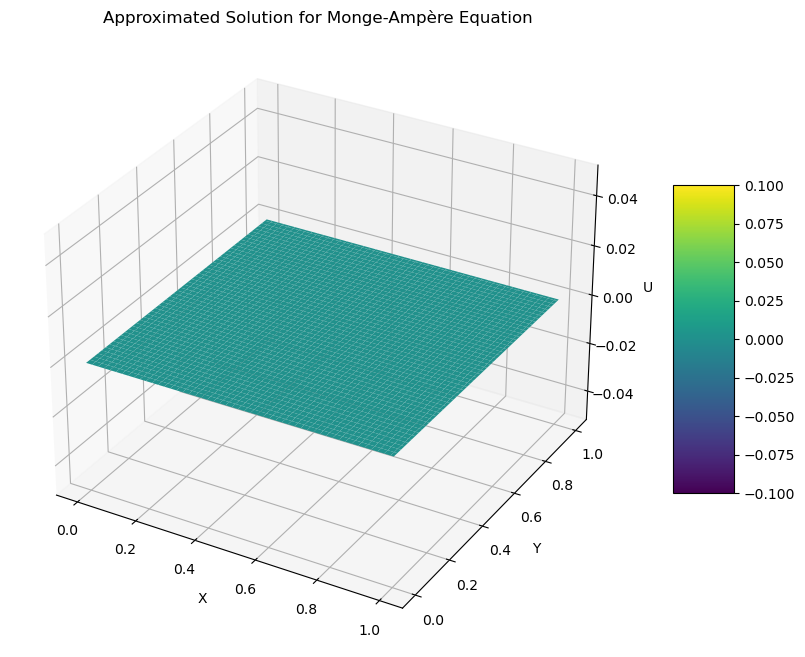

In [2]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Assuming nx and ny define the grid size and u_solution contains the grid values
x = np.linspace(0, 1, nx)
y = np.linspace(0, 1, ny)
X, Y = np.meshgrid(x, y)

fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

# Plot the surface.
surf = ax.plot_surface(X, Y, u_solution, cmap='viridis', edgecolor='none')

# Customize the z axis.
ax.set_zlim(u_solution.min(), u_solution.max())
ax.set_title('Approximated Solution for Monge-Ampère Equation')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('U')

# Add a color bar which maps values to colors.
fig.colorbar(surf, shrink=0.5, aspect=5)

plt.show()
